### Treating Outliers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./climate_change_data.csv')
data.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [3]:
data.shape

(10000, 9)

In [4]:
data.isnull().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

#### Lets consider the Temperature column

#### Plotting the box plot for checking outliers

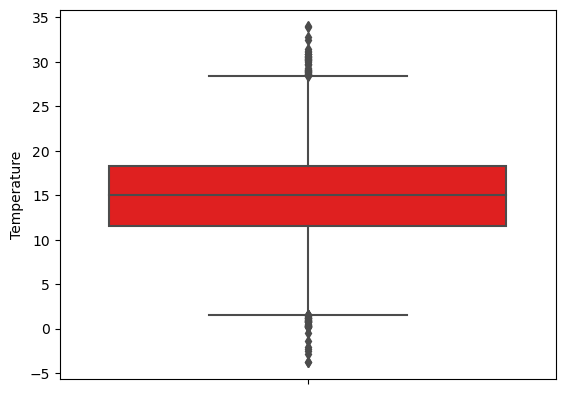

In [5]:
sns.boxplot(data=data,y='Temperature', color='red');

#### Setting the outlier limits

In [6]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [10]:
UL,LL = outlier_limit(data['Temperature'])
data['Temperature'] = np.where((data['Temperature']>UL) | (data['Temperature']<LL),np.nan,data['Temperature'])

#### Checking the NaN values

In [8]:
data.isnull().sum()

Date               0
Location           0
Country            0
Temperature       76
CO2 Emissions      0
Sea Level Rise     0
Precipitation      0
Humidity           0
Wind Speed         0
dtype: int64

#### We can see that there is 3 outliers present in the DataFrame. We have to drop it.

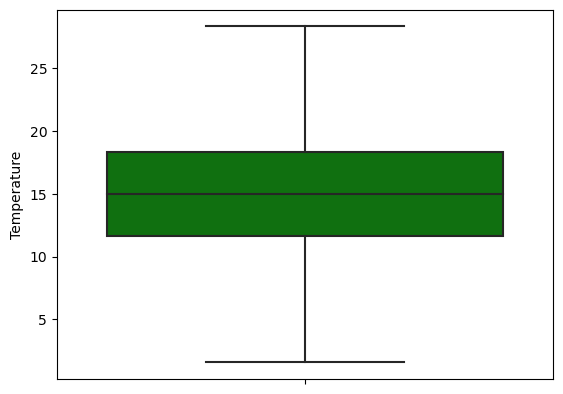

In [11]:
sns.boxplot(data=data, y='Temperature',color='green');